In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon, Point
import pyproj
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline


bsas_map = gpd.read_file('../gopa_data/barrios-ciudad')
coordinates = pd.read_csv('coordinates_data.csv')

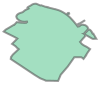

In [29]:
bsas_map.geometry[43] #palermo

In [30]:
bsas_map.head()

,BARRIO,COMUNA,GEOJSON,geometry
0,CHACARITA,15.0,"{""type"":""MultiPolygon"",""coordinates"":[[[[-58.4...","POLYGON ((-58.45282 -34.59599, -58.45366 -34.5..."
1,PATERNAL,15.0,"{""type"":""MultiPolygon"",""coordinates"":[[[[-58.4...","POLYGON ((-58.46558 -34.59656, -58.46562 -34.5..."
2,VILLA CRESPO,15.0,"{""type"":""MultiPolygon"",""coordinates"":[[[[-58.4...","POLYGON ((-58.42375 -34.59783, -58.42495 -34.5..."
3,VILLA DEL PARQUE,11.0,"{""type"":""MultiPolygon"",""coordinates"":[[[[-58.4...","POLYGON ((-58.49461 -34.61487, -58.49479 -34.6..."
4,ALMAGRO,5.0,"{""type"":""MultiPolygon"",""coordinates"":[[[[-58.4...","POLYGON ((-58.41287 -34.61412, -58.41282 -34.6..."


In [31]:
coordinates.drop(columns='geometry', inplace=True)
gpd_data = gpd.GeoDataFrame(coordinates,
                         geometry = gpd.points_from_xy(coordinates.search_longitude, coordinates.search_latitude))
gpd_data.head()

,search_longitude,search_latitude,arrive,leave,search_method,timestamp,uid,x,y,new_x,new_y,arrive_date,dayOfWeek,geometry
0,-58.440447,-34.620694,2021-02-28 15:56:00+00:00,2021-02-28 17:32:00+00:00,google,2021-01-31T19:35:42.438-03:00,NaN,-58.440447,-34.620694,0.097696,0.084863,2021-02-28,6,POINT (-58.44045 -34.62069)
1,-58.418288,-34.581668,2021-02-13 15:12:45.668000+00:00,2021-02-13 16:12:45.668000+00:00,searchInThisArea,2021-02-13T12:13:03.714-03:00,e8itgepSU1YX6Q48HtrDpz76OXr1,-58.418288,-34.581668,0.119855,0.123889,2021-02-13,5,POINT (-58.41829 -34.58167)
2,-58.208933,-34.831096,2021-01-25 17:45:27.320000+00:00,2021-01-25 18:45:27.320000+00:00,searchInThisArea,2021-01-25T14:45:44.753-03:00,NaN,-58.208933,-34.831096,0.329210,-0.125539,2021-01-25,0,POINT (-58.20893 -34.83110)
3,-58.454943,-34.564354,2021-02-25 11:20:09.755000+00:00,2021-02-25 12:20:09.755000+00:00,searchInThisArea,2021-02-25T08:22:32.254-03:00,NaN,-58.454943,-34.564354,0.083200,0.141203,2021-02-25,3,POINT (-58.45494 -34.56435)
4,-58.451924,-34.559296,2020-09-17 10:45:00+00:00,2020-09-17 11:00:00+00:00,update_time_home,2020-09-17T08:13:03.302GMT-03:00,unauthenticated,-58.451924,-34.559296,0.086219,0.146261,2020-09-17,3,POINT (-58.45192 -34.55930)


(-34.7, -34.525)

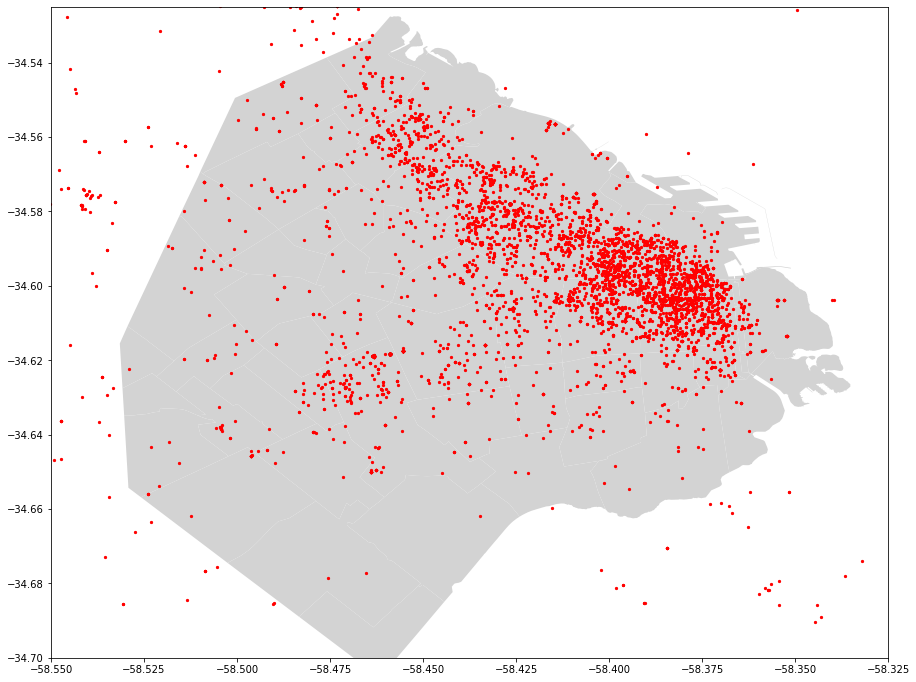

In [32]:
fig,ax = plt.subplots(figsize = (15,16))
bsas_map.plot(ax=ax, color='lightgrey')
gpd_data.plot(ax=ax, markersize=5, color='red')
ax.set_xlim([-58.550, -58.325])
ax.set_ylim([-34.700, -34.525])



Busco un barrio en especial

In [33]:
list1 = []
for i in range (43):
    list1.append(i)
for i in range (44,53):
    list1.append(i)

In [34]:
bsas_map.drop(list1, axis=0, inplace=True)
bsas_map

,BARRIO,COMUNA,GEOJSON,geometry
43,PALERMO,14.0,"{""type"":""MultiPolygon"",""coordinates"":[[[[-58.4...","POLYGON ((-58.42676 -34.55202, -58.42676 -34.5..."


(-34.7, -34.525)

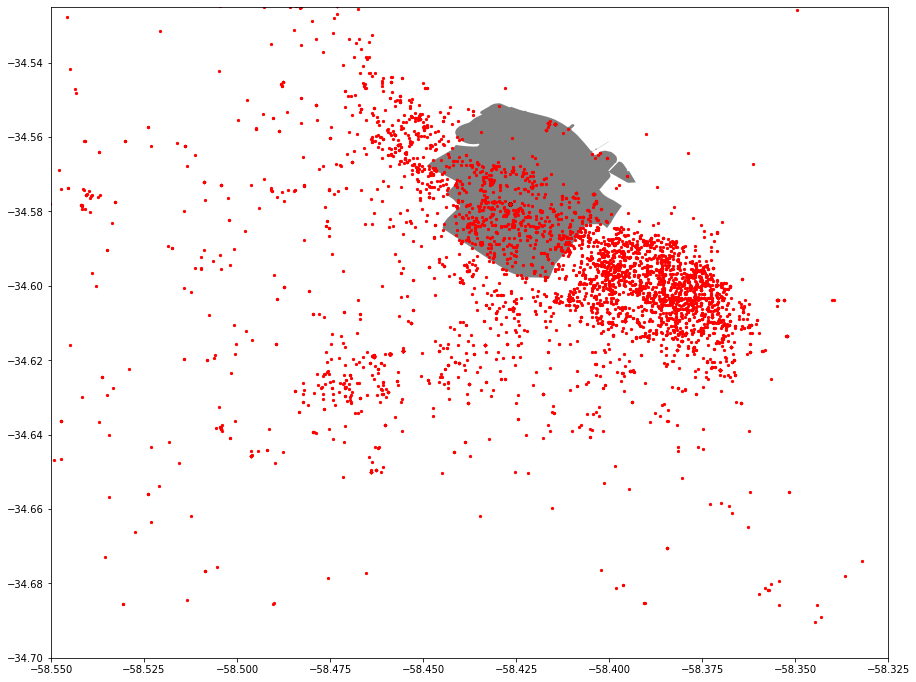

In [35]:
fig,ax = plt.subplots(figsize = (15,16))
bsas_map.plot(ax=ax, color='grey')
gpd_data.plot(ax=ax, markersize=5, color='red')
ax.set_xlim([-58.550, -58.325])
ax.set_ylim([-34.700, -34.525])


In [36]:
palermo = bsas_map.geometry
reservas = gpd_data.geometry
reservas_palermo = reservas.contains(palermo)
coordinates_palermo = gpd_data.copy()


In [37]:
palermo

43    POLYGON ((-58.42676 -34.55202, -58.42676 -34.5...
Name: geometry, dtype: geometry

In [38]:
reservas_palermo.nunique()

1

In [39]:
coordinates_palermo['reservas_palermo'] = reservas_palermo
coordinates_palermo = coordinates_palermo[coordinates_palermo.reservas_palermo == True]


In [40]:
coordinates_palermo

,search_longitude,search_latitude,arrive,leave,search_method,timestamp,uid,x,y,new_x,new_y,arrive_date,dayOfWeek,geometry,reservas_palermo
